In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import NMF

%matplotlib inline

## 1. Merge Vote data with Gemeente data

In [2]:
df = pd.read_csv("C:/Users/yubin/Desktop/Scott/kwb_2016.csv")
df.shape

(16194, 109)

In [3]:
# slice 390 municipalities
df_g = df[df["Type of region"] == "Gemeente"]
df_g.shape

(390, 109)

In [4]:
df_v = pd.read_csv("C:\\Users\\yubin\\Desktop\\Scott\\Gemeente_uitslagen_TK2017.csv",
                   index_col = "GemeenteCode").iloc[:,:-2]
colname = list(df_v.columns)
colname[0] = "Municipal name"
df_v.columns = colname

In [5]:
df_v = df_v.sort_values(by = "Municipal name")
df_g = df_g.sort_values(by = "Municipal name")

In [6]:
df_v["Municipal name"][df_v["Municipal name"].apply(lambda x: x[:2]) == "Nu"]

GemeenteCode
820    Nuenen, Gerwen en Nederwetten
302                         Nunspeet
951                             Nuth
Name: Municipal name, dtype: object

In [7]:
df_v.loc[820, "Municipal name"] = 'Nuenen. Gerwen en Nederwetten'

In [8]:
df_v.loc[820, "Municipal name"]

'Nuenen. Gerwen en Nederwetten'

In [9]:
df = pd.merge(left = df_v.reset_index(drop = True),
              right = df_g.reset_index(drop=True),
              left_on = "Municipal name", right_on = "Municipal name")
df.to_csv("merged.csv")
df.set_index("Municipal name", inplace = True)

In [10]:
df_v = df.iloc[:, :28]
df_v = df_v.fillna(0)

## 2. Normalize Data

In [11]:
# Sum of population, ratio, cumulative sum

In [12]:
df_v["Pop"] = df_v.sum(axis = 1)
df_v.sort_values("Pop", ascending = False, inplace = True)

In [13]:
df_v["Pop_ratio"] = df_v["Pop"].apply(lambda x: x/df_v["Pop"].sum())
df_v["Pop_ratio"].sum()

0.9999999999999998

In [14]:
df_v["Pop_ratio_cum"] = df_v["Pop_ratio"].cumsum()

In [15]:
df_v.head(168).tail(10).iloc[:, -3:]
# 168 municipalities contain 75% of the whole population

,Pop,Pop_ratio,Pop_ratio_cum
Municipal name,,,
Leusden,20166.0,0.001927,0.733258
Deurne,20140.0,0.001925,0.735183
Valkenswaard,19904.0,0.001902,0.737085
Oost Gelre,19650.0,0.001878,0.738963
Binnenmaas,19543.0,0.001868,0.740831
Stadskanaal,19510.0,0.001865,0.742696
Aalsmeer,19443.0,0.001858,0.744554
Opsterland,19068.0,0.001822,0.746376
Bernheze,18991.0,0.001815,0.748192


In [16]:
mun = df_v.index.tolist()

In [17]:
df_v.reset_index(inplace = True)

In [18]:
cols = ['Municipal name', 'Pop', 'Pop_ratio', 'Pop_ratio_cum',
        'VVD', 'CDA', 'PVV (Partij voor de Vrijheid)', 'Democraten 66 (D66)',
        'SP (Socialistische Partij)', 'GROENLINKS', 'Partij van de Arbeid (P.v.d.A.)',
        'ChristenUnie', '50PLUS', 'Partij voor de Dieren', 'Staatkundig Gereformeerde Partij (SGP)',
        'Forum voor Democratie', 'DENK', 'VNL (VoorNederland)', 'Piratenpartij',
        'NIEUWE WEGEN', 'OndernemersPartij', 'Artikel 1', 'Lokaal in de Kamer',
        'Niet Stemmers', 'De Burger Beweging', 'GeenPeil', 'Vrijzinnige Partij',
        'JEZUS LEEFT', 'Libertarische Partij (LP)',
        'MenS en Spirit / Basisinkomen Partij / V-R', 'StemNL',
        'Vrije Democratische Partij (VDP)']

In [19]:
df_v = df_v[cols]

## 3. NMF Analysis

In [20]:
df_v.shape

(387, 32)

In [21]:
df_v = df_v.iloc[:, 4:]
df_v.head()

,VVD,CDA,PVV (Partij voor de Vrijheid),Democraten 66 (D66),SP (Socialistische Partij),GROENLINKS,Partij van de Arbeid (P.v.d.A.),ChristenUnie,50PLUS,Partij voor de Dieren,...,Lokaal in de Kamer,Niet Stemmers,De Burger Beweging,GeenPeil,Vrijzinnige Partij,JEZUS LEEFT,Libertarische Partij (LP),MenS en Spirit / Basisinkomen Partij / V-R,StemNL,Vrije Democratische Partij (VDP)
0,70249,13562,31260,86410,29326,90572,38279,6833,8904,27553,...,204.0,458.0,239.0,270.0,150.0,0.0,123.0,0.0,0.0,0.0
1,53382,18813,50759,42687,26830,37591,20627,7622,10835,12618,...,200.0,254.0,151.0,196.0,123.0,0.0,87.0,0.0,42.0,0.0
2,67595,19853,45242,51649,17614,39242,21784,6134,7850,13785,...,170.0,226.0,133.0,240.0,105.0,0.0,70.0,0.0,0.0,49.0
3,35248,11377,15157,46444,9995,42093,12030,5486,2952,9482,...,0.0,95.0,58.0,132.0,61.0,74.0,43.0,59.0,11.0,0.0
4,17696,8621,8723,25973,14152,24642,10438,5757,2181,6737,...,81.0,119.0,82.0,72.0,45.0,0.0,33.0,0.0,0.0,0.0


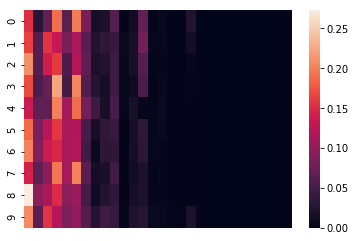

In [22]:
df_v_norm2 = df_v.apply(lambda x: x / x.sum(), axis = 1)
sns.heatmap(df_v_norm2.iloc[:10], xticklabels=False)

In [23]:
df_v_norm2.sum(axis = 1).head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
dtype: float64

In [24]:
# fit the model
n_parties = 28
n_munic = 168

df_train = df_v_norm2.iloc[:n_munic, :n_parties]

# decompose into 5 components
n_components = 5
nmf = NMF(n_components = n_components)

W = nmf.fit_transform(df_train)
H = nmf.components_

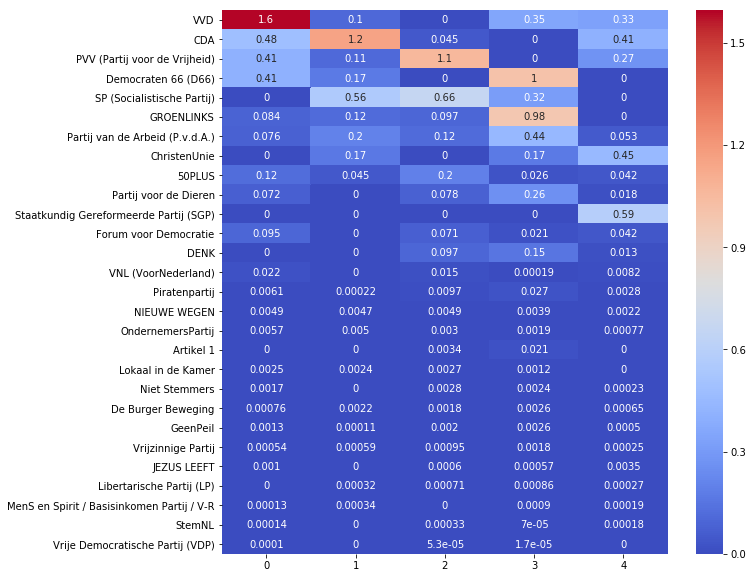

In [25]:
H = pd.DataFrame(H.T, index = df_train.columns)
plt.figure(figsize = (10,10))
sns.heatmap(H, cmap = "coolwarm", annot = True)
# 12~13 parties (out of 28) seem to be enough
# 5 features show weights of corresponding parties
# for example, feature 2: PVV (1.3), SP (1.1) are dominant

In [26]:
# Plot every Gemeente by these 5 features

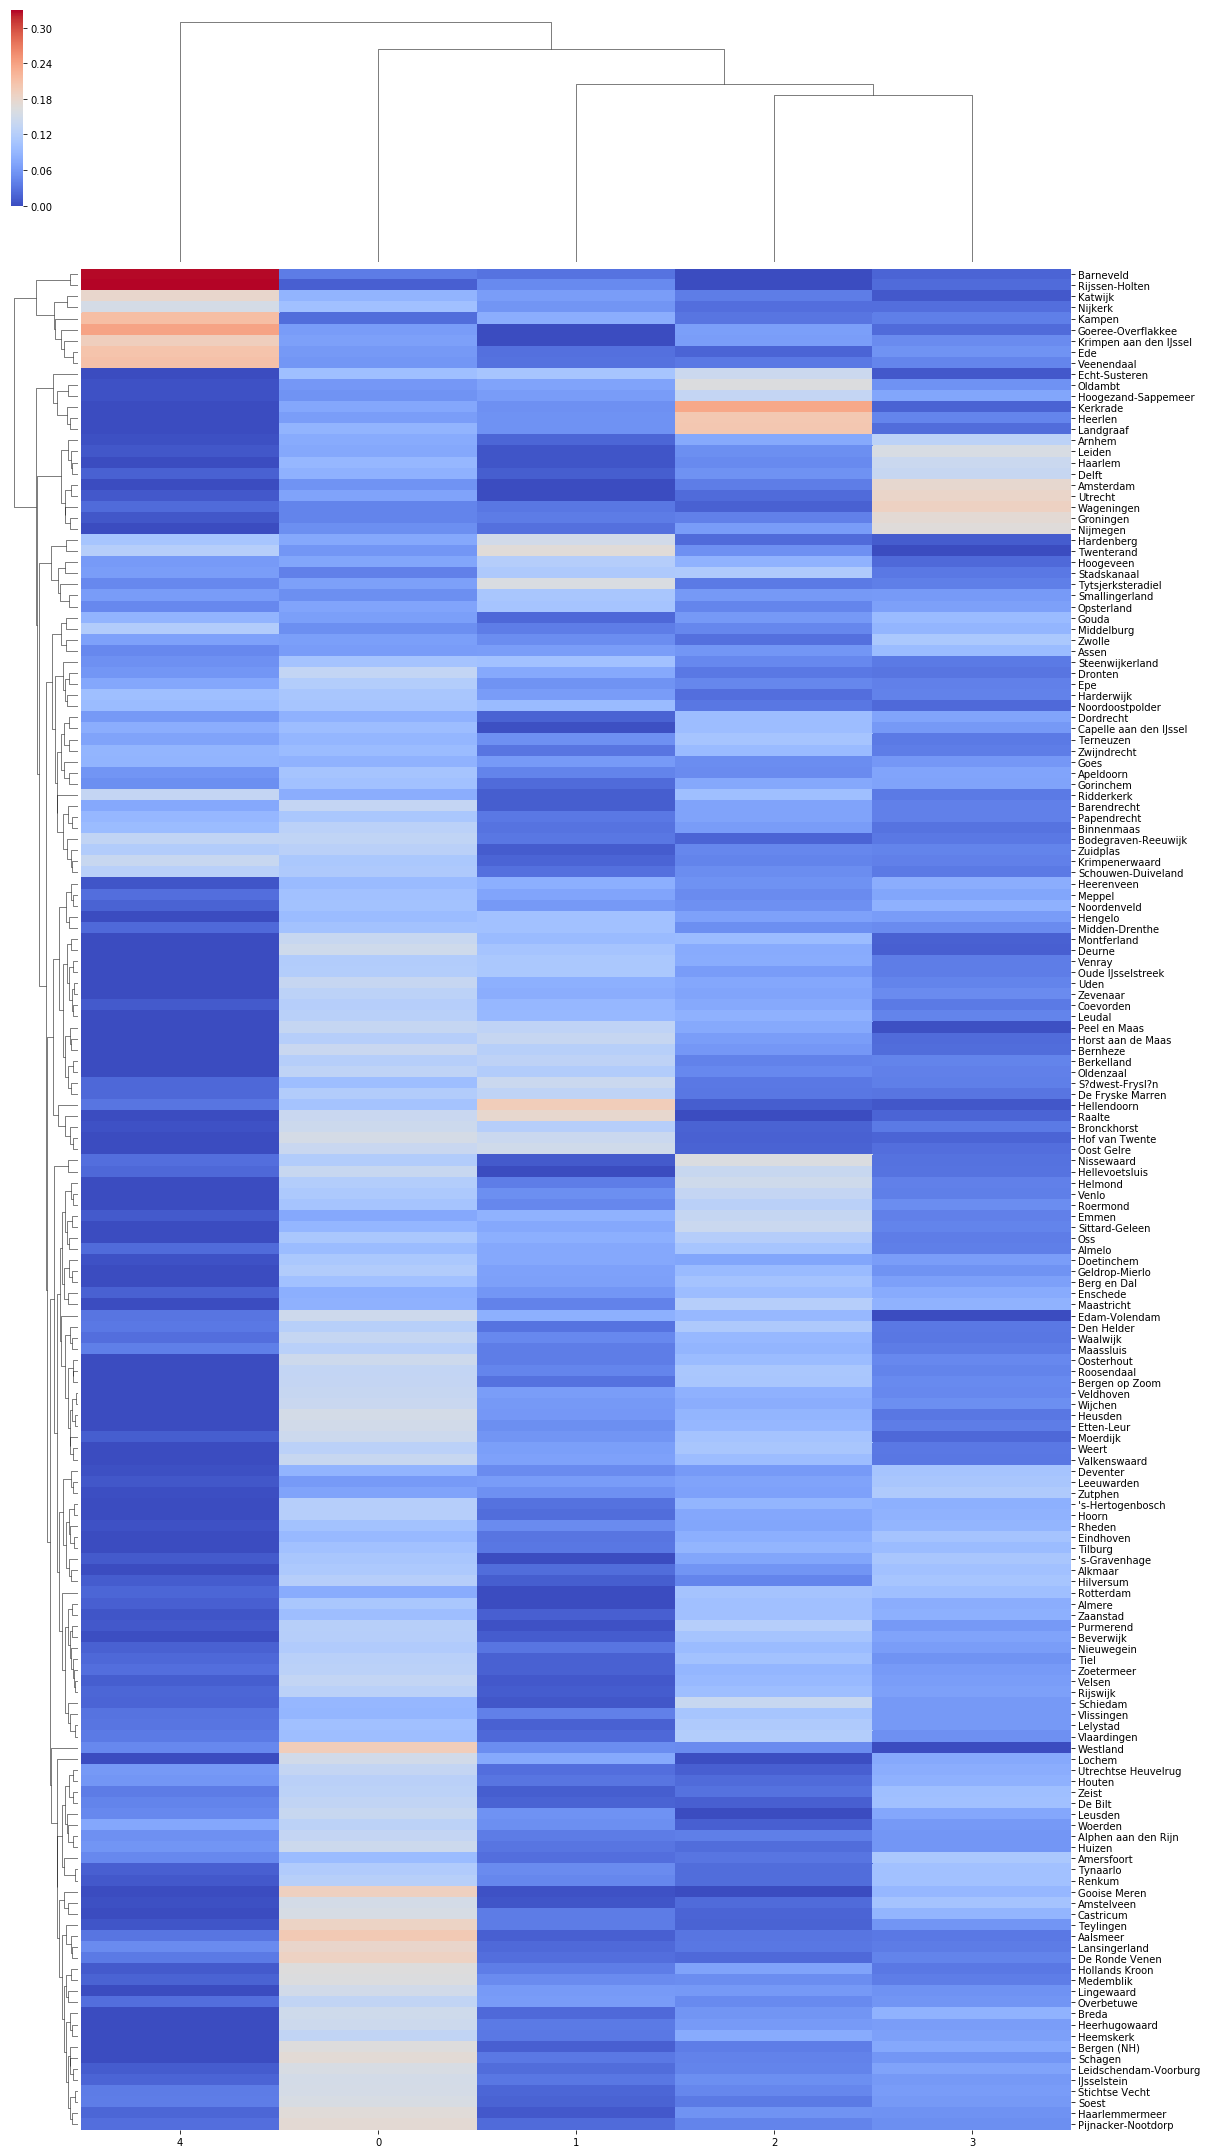

In [27]:
W = pd.DataFrame(W, index = mun[:n_munic])
sns.clustermap(W, cmap = "coolwarm", vmin = .0, vmax = 0.33, figsize=(19,39))

### Distinctive clusters

In [28]:
W = W.T

#### 1) Strong preference to feature 3 (D66, GROELINKS)

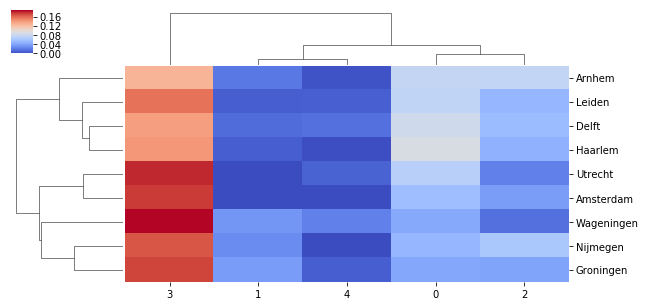

In [29]:
sns.clustermap(W[["Nijmegen","Groningen","Wageningen","Utrecht","Amsterdam","Delft","Haarlem","Leiden","Arnhem"]].T,
               cmap = "coolwarm", figsize = (10,5))

#### 2) Strong preference to feature 4 (SGP, ChristineUni, VVD, CDA, PVV)

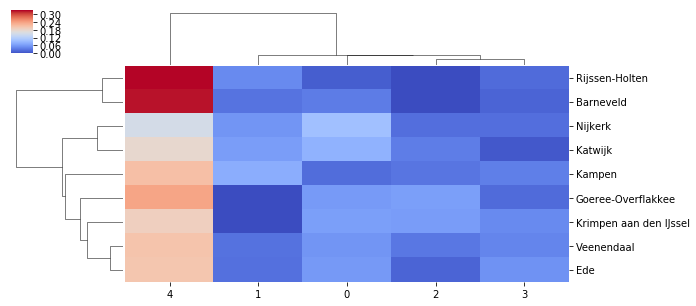

In [30]:
sns.clustermap(W[["Veenendaal","Ede", "Krimpen aan den IJssel","Goeree-Overflakkee","Kampen","Nijkerk","Katwijk", "Rijssen-Holten", "Barneveld"]].T,
               cmap = "coolwarm", figsize = (10,5))

In [31]:
W = W.T

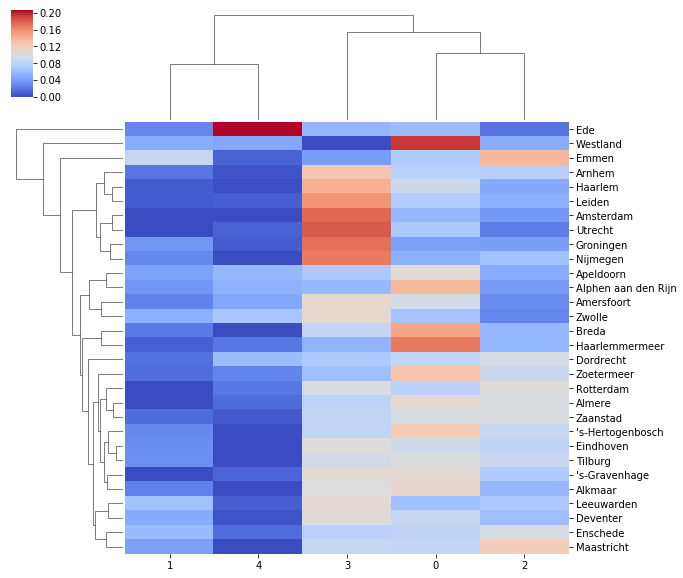

In [32]:
# Top 30 largest municipalities
n_munic = 30
W = pd.DataFrame(W, index = mun[:n_munic])
sns.clustermap(W, cmap = "coolwarm")

## 3. Sensiticity Check
Since the method can be sensitive depending on the selection of components number and subset of the data

### 1) fit the model with 12 parties and 168 Gemeente

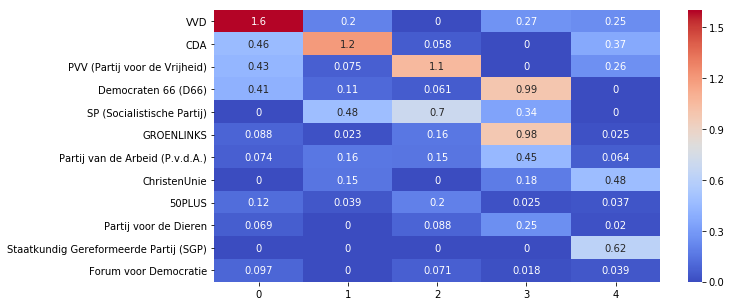

In [33]:
n_parties = 12
n_munic = 168

df_train = df_v_norm2.iloc[:n_munic, :n_parties]

# decompose into 5 components
n_components = 5
nmf = NMF(n_components = n_components)

W = nmf.fit_transform(df_train)
H = nmf.components_

H = pd.DataFrame(H.T, index = df_train.columns)
plt.figure(figsize = (10,5))
sns.heatmap(H, cmap = "coolwarm", annot = True)
# 12~13 parties (out of 28) seem to be enough
# 5 features show weights of corresponding parties
# for example, feature 2: PVV (1.3), SP (1.1) are dominant

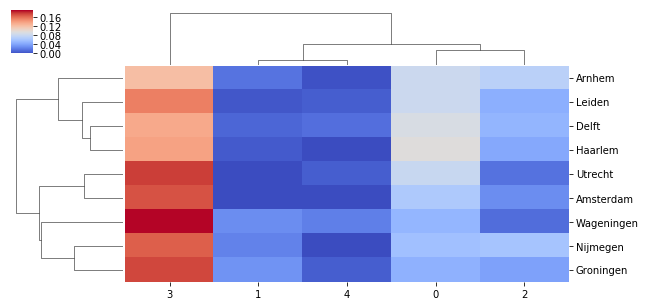

In [34]:
W = pd.DataFrame(W, index = mun[:n_munic])
W = W.T
sns.clustermap(W[["Nijmegen","Groningen","Wageningen","Utrecht","Amsterdam","Delft","Haarlem","Leiden","Arnhem"]].T,
               cmap = "coolwarm", figsize = (10,5))

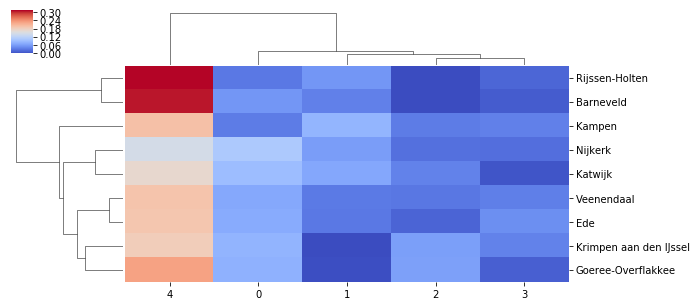

In [35]:
sns.clustermap(W[["Veenendaal","Ede", "Krimpen aan den IJssel","Goeree-Overflakkee","Kampen","Nijkerk","Katwijk", "Rijssen-Holten", "Barneveld"]].T,
               cmap = "coolwarm", figsize = (10,5))

Clusters are still maintained!

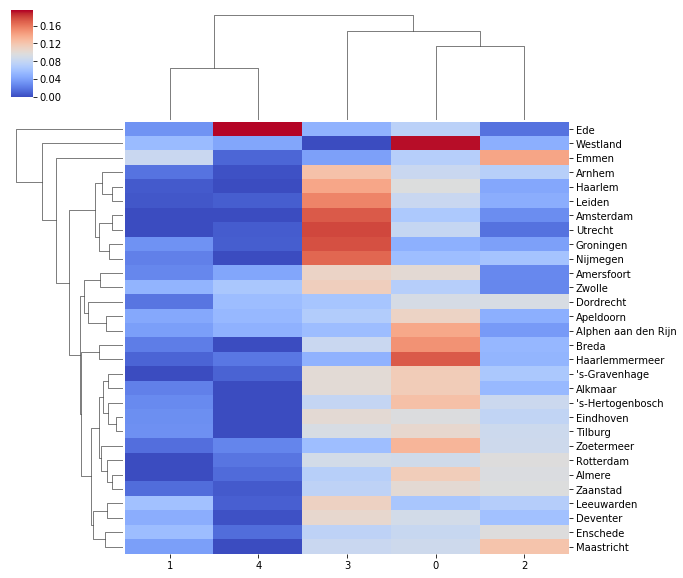

In [36]:
W = W.T
# Top 30 largest municipalities
n_munic = 30
W = pd.DataFrame(W, index = mun[:n_munic])
sns.clustermap(W, cmap = "coolwarm")

### 2) fit the model with 28 parties and 387 Gemeente

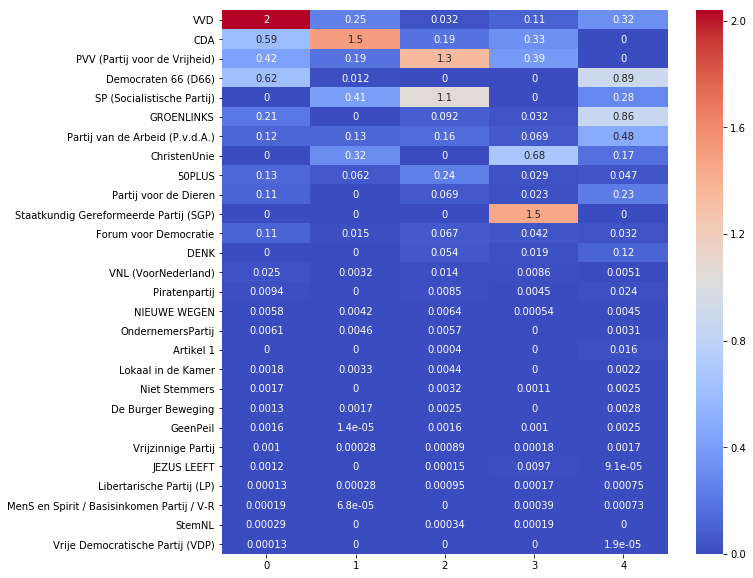

In [37]:
n_parties = 28
n_munic = 387

df_train = df_v_norm2.iloc[:n_munic, :n_parties]

# decompose into 5 components
n_components = 5
nmf = NMF(n_components = n_components)

W = nmf.fit_transform(df_train)
H = nmf.components_

H = pd.DataFrame(H.T, index = df_train.columns)
plt.figure(figsize = (10,10))
sns.heatmap(H, cmap = "coolwarm", annot = True)
# 12~13 parties (out of 28) seem to be enough
# 5 features show weights of corresponding parties
# for example, feature 2: PVV (1.3), SP (1.1) are dominant

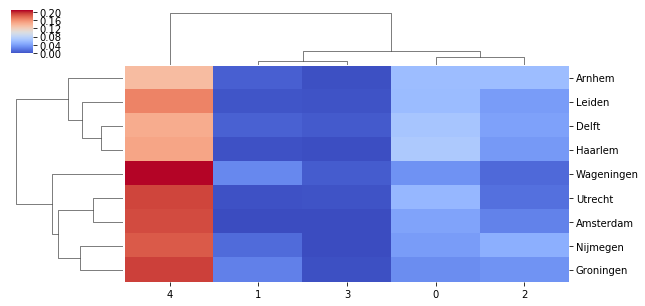

In [38]:
W = pd.DataFrame(W, index = mun[:n_munic])
W = W.T
sns.clustermap(W[["Nijmegen","Groningen","Wageningen","Utrecht","Amsterdam","Delft","Haarlem","Leiden","Arnhem"]].T,
               cmap = "coolwarm", figsize = (10,5))

Clusters are still maintained!

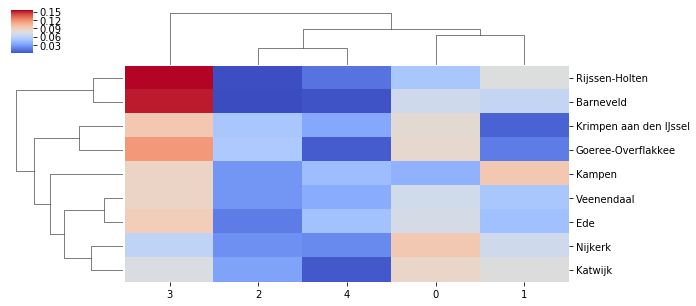

In [39]:
sns.clustermap(W[["Veenendaal","Ede", "Krimpen aan den IJssel","Goeree-Overflakkee","Kampen","Nijkerk","Katwijk", "Rijssen-Holten", "Barneveld"]].T,
               cmap = "coolwarm", figsize = (10,5))

Some Gemeentes left out of the cluster

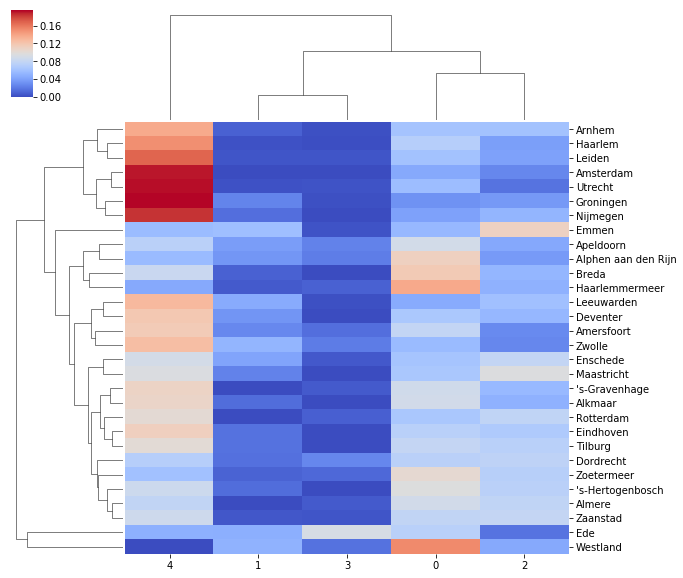

In [40]:
W = W.T
# Top 30 largest municipalities
n_munic = 30
W = pd.DataFrame(W, index = mun[:n_munic])
sns.clustermap(W, cmap = "coolwarm")